In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the path to your labeled image data directory
data_dir = r'C:\Users\sagar\OneDrive\Desktop\Fall 2024\Smart-Waste-Classification-A-TensorFlow-and-Kera-s-Powered-Framework-Using-Advanced-Computer-Vision\labelled_Data'

# Create a dictionary to store images with their labels
image_data = {}

# Iterate over the folders (assuming folder names are labels)
for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    
    # Check if it's a directory (folder containing images)
    if os.path.isdir(folder_path):
        images = []
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            
            # Load the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is not None:
                images.append(image)
        
        # Store images in dictionary with the folder name as label
        image_data[label] = images

# Print the number of images loaded for each label
for label, images in image_data.items():
    print(f"Loaded {len(images)} images for label: {label}")

Loaded 15289 images for label: Compost
Loaded 17625 images for label: Recyclable
Loaded 1334 images for label: Trash


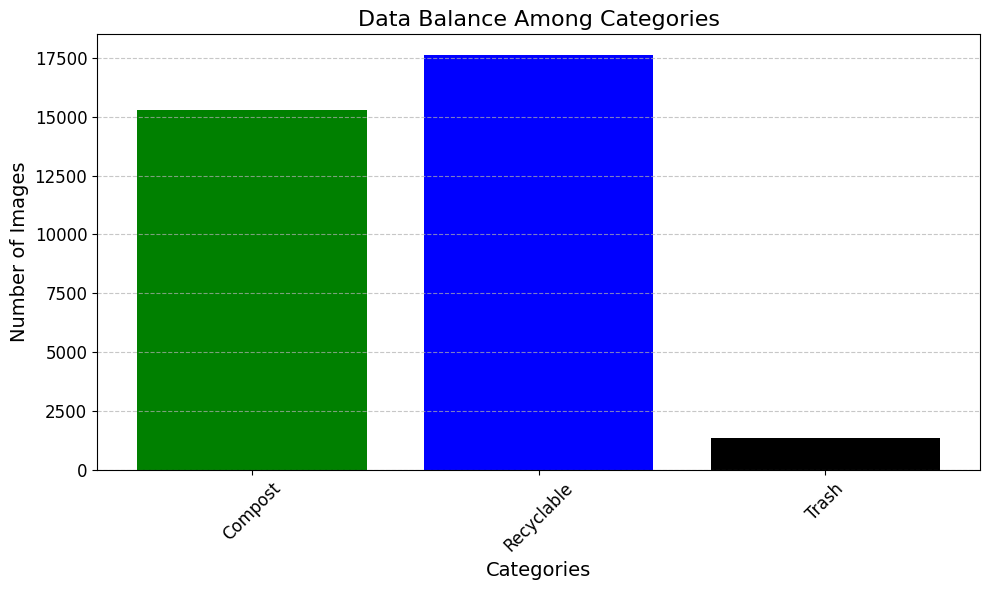

In [3]:
# Function to plot data balance
def plot_data_balance(image_data):
    categories = list(image_data.keys())  # Get category names
    counts = [len(images) for images in image_data.values()]  # Get counts of images per category

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['green', 'blue', 'black'])  # Color for each category
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title('Data Balance Among Categories', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)  # Rotate category names for better visibility
    plt.yticks(fontsize=12)  # Font size for y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()  # Display the plot

# Call the function to plot the data balance
plot_data_balance(image_data)

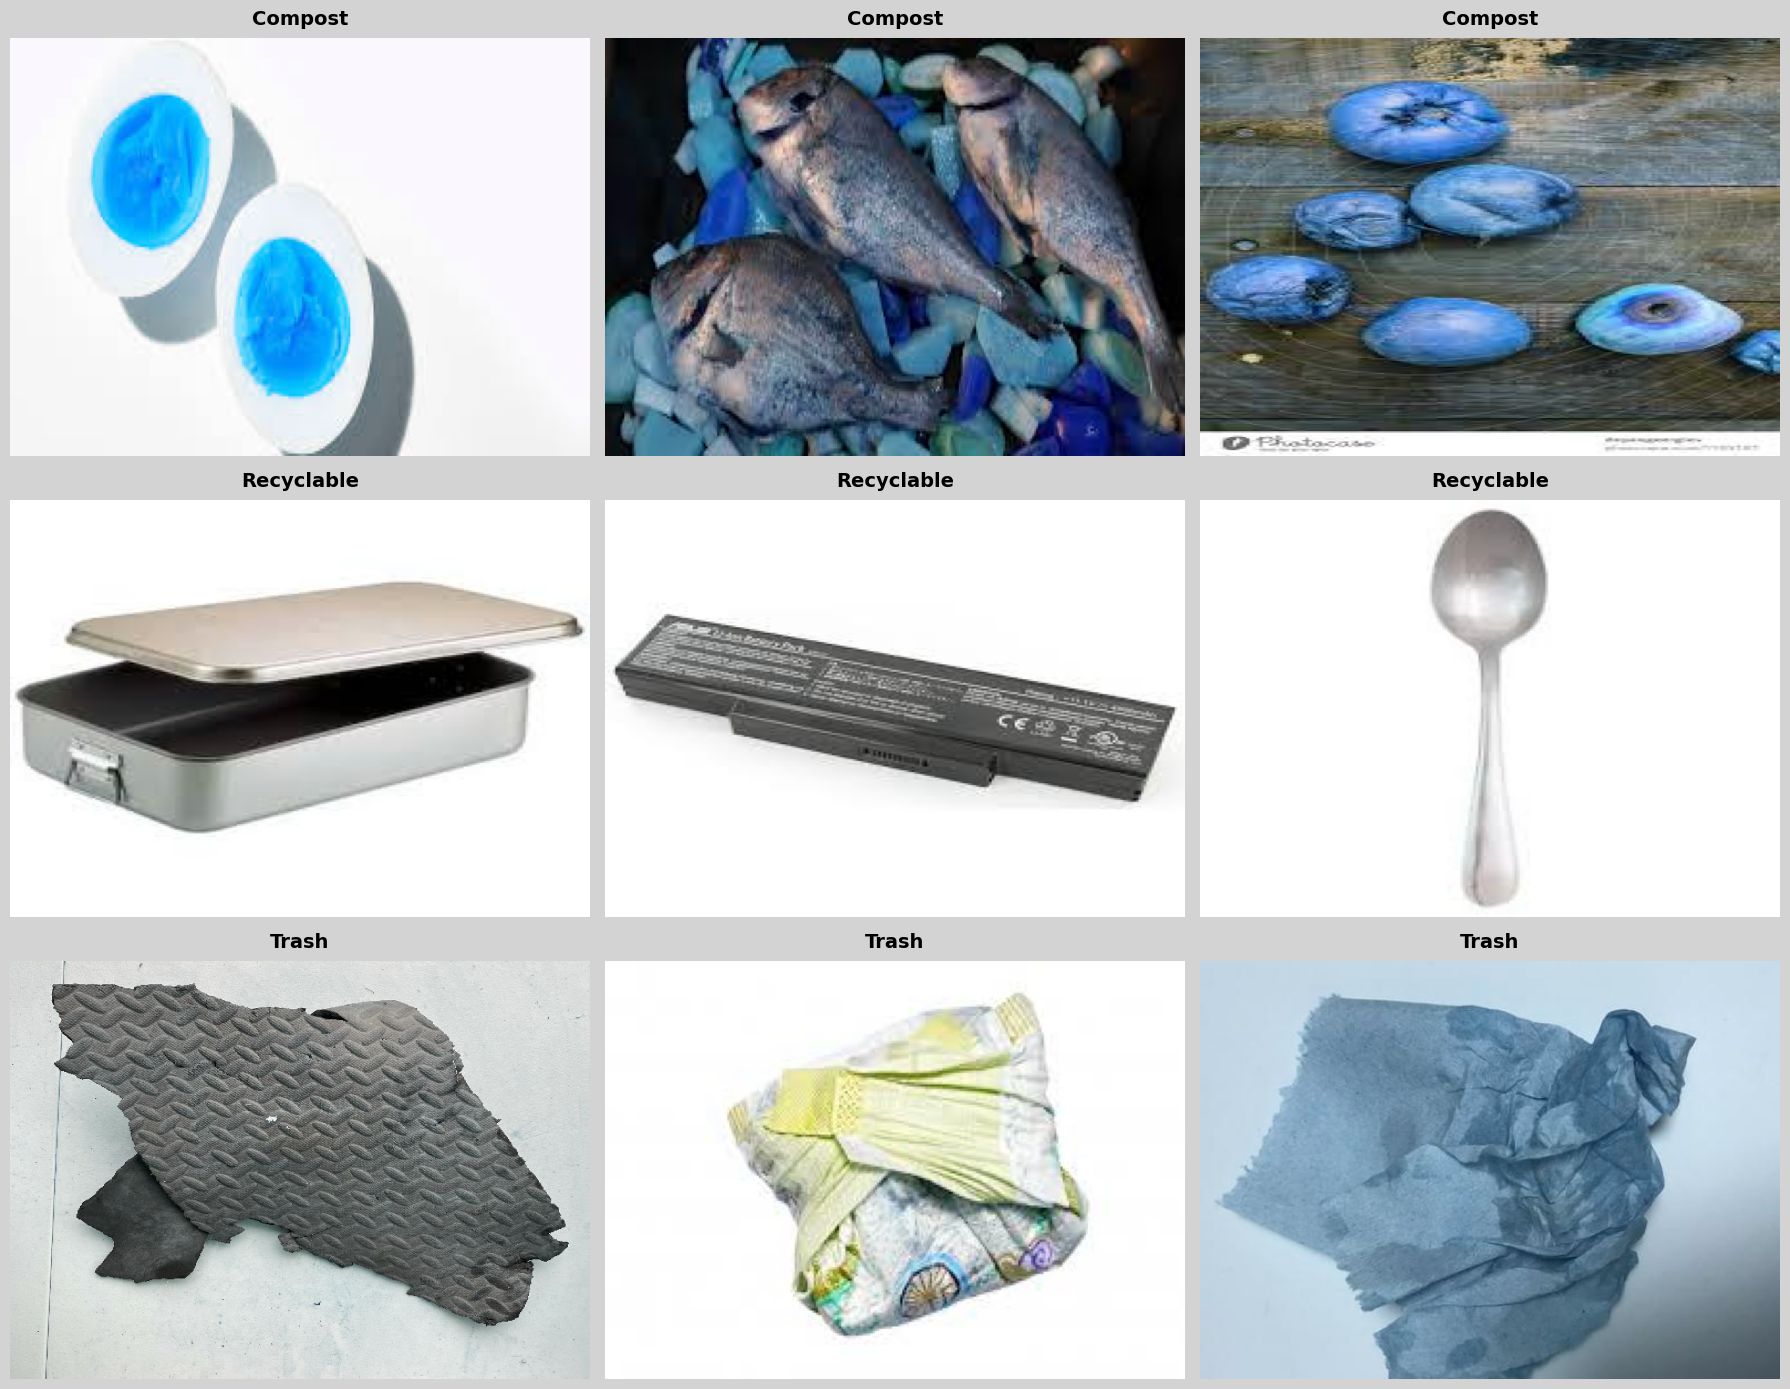

In [4]:
# Number of images to display per category
num_images_to_display = 3  # Number of rows
num_columns = 3            # Number of columns

# Function to display images from the image_data dictionary
def display_images(image_data, num_images=4, num_columns=3):
    num_rows = num_images  # Each category will have a fixed number of rows
    plt.figure(figsize=(18, 14), facecolor='lightgray')  # Adjust figure size and background color
    
    for i, (label, images) in enumerate(image_data.items()):

        # Randomly select images if there are more than 'num_images_to_display'
        selected_images = random.sample(images, min(num_images, len(images)))

        for j, img in enumerate(selected_images):
            # Calculate the position in the grid
            ax = plt.subplot(num_images, num_columns, i * num_images + j + 1)
            ax.axis("off")  # Turn off axis

            # Convert image to a format suitable for plotting
            img_tensor = tf.convert_to_tensor(img)  # Convert to TensorFlow tensor
            
            # Maintain aspect ratio when displaying images
            ax.imshow(img_tensor.numpy().astype("uint8"), aspect='auto')

            # Adding a border and title to the images
            ax.set_title(f"{label}", fontsize=14, fontweight='bold', color='black', pad=10)
            plt.setp(ax.get_xticklabels(), visible=False)  # Hide x-tick labels
            plt.setp(ax.get_yticklabels(), visible=False)  # Hide y-tick labels
            
            # Adding a border effect
            for spine in ax.spines.values():
                spine.set_edgecolor('black')  # Set the color of the borders
                spine.set_linewidth(2)  # Set the width of the borders

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the grid of images

# Display images from the image_data
display_images(image_data, num_images=num_images_to_display, num_columns=num_columns)

In [5]:
# Function to augment trash images and display the total count
def augment_and_display_trash_image_count(image_data, augment_factor=5):
    # Retrieve trash images
    trash_images = image_data.get('Trash', [])
    
    # Print the original count of trash images
    original_count = len(trash_images)
    print(f"Original number of trash images: {original_count}")
    
    # Create an ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

    # Store augmented images
    augmented_images = []

    for img in trash_images:
        # Reshape image for the generator
        img = img.reshape((1,) + img.shape)  # Reshape for the ImageDataGenerator

        # Generate augmented images
        for j, batch in enumerate(datagen.flow(img, batch_size=1)):
            augmented_images.append(batch[0].astype("uint8"))  # Add the augmented image to the list
            
            if j >= augment_factor - 1:  # Generate only 'augment_factor' augmented versions
                break

    # Update the image_data diaugmented_imagesctionary with augmented images
    image_data['Trash'] += 
    
    # Print the new count of trash images after augmentation
    new_count = len(image_data['Trash'])
    print(f"New number of trash images after augmentation: {new_count}")

# Call the function to augment and display trash image counts
augment_and_display_trash_image_count(image_data, augment_factor=5)  # Change parameters as needed

Original number of trash images: 1334
New number of trash images after augmentation: 8004


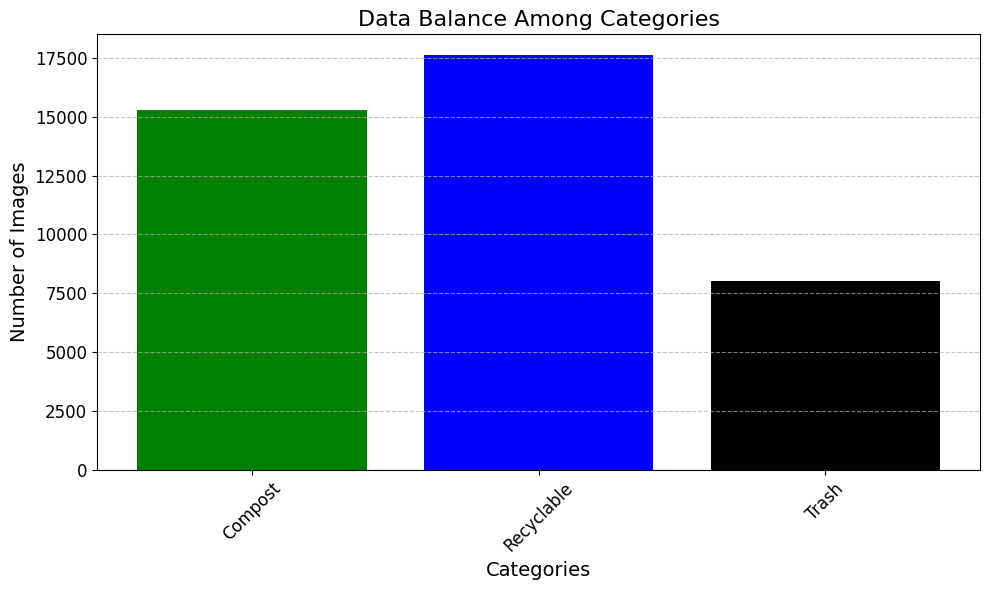

In [9]:
# Function to plot data balance
def plot_data_balance(image_data):
    categories = list(image_data.keys())  # Get category names
    counts = [len(images) for images in image_data.values()]  # Get counts of images per category

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['green', 'blue', 'black'])  # Color for each category
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title('Data Balance Among Categories', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)  # Rotate category names for better visibility
    plt.yticks(fontsize=12)  # Font size for y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()  # Display the plot

# Call the function to plot the data balance
plot_data_balance(image_data)